# CSE 477s: Project 1.
## Leaf Classification problem.

### problem definition:
There are estimated to be nearly half a million species of plant in the world. Classification of species has been historically problematic and often results in duplicate identifications.

the objective of this problem is to identify 99 species of plants due to their volume, prevalence, and unique characteristics, are an effective means of differentiating plant species.

### problem formulation:
    1. input: Features collected from half a million species of plant in the world including: shape, margin & texture.
    2. output: predicted species.
    3. deep learning: fully connected neural networks with different hyperparameters.

## Data description:

Data fields:-
* id - an anonymous id unique to an image
* margin_1, margin_2, margin_3, ..., margin_64 - each of the 64 attribute vectors for the margin feature
* shape_1, shape_2, shape_3, ..., shape_64 - each of the 64 attribute vectors for the shape feature
* texture_1, texture_2, texture_3, ..., texture_64 - each of the 64 attribute vectors for the texture feature

### This notebook contains:
1. Reading, explore and preprocessing of data.
2. Label encoding, normalize, and split the data into train and test.
3. build the evaluation_model function.
4. train the model with different hyperparameters.
5. best model.

## 1. Reading, explore and preprocessing of data:
### 1.1 import required libraries.

In [1]:
import numpy as np # linear algebra.
import pandas as pd # data processing, CSV file I/O
# for visualizations.
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
import os
import tensorflow as tf
from sklearn import preprocessing, model_selection

### 1.2 Reading train/test data.

In [2]:
#reading train data csv file.
train_data=pd.read_csv('train.csv/train.csv')
train_data.head()

id                species   margin1   margin2   margin3   margin4  \
0   1            Acer_Opalus  0.007812  0.023438  0.023438  0.003906   
1   2  Pterocarya_Stenoptera  0.005859  0.000000  0.031250  0.015625   
2   3   Quercus_Hartwissiana  0.005859  0.009766  0.019531  0.007812   
3   5        Tilia_Tomentosa  0.000000  0.003906  0.023438  0.005859   
4   6     Quercus_Variabilis  0.005859  0.003906  0.048828  0.009766   

    margin5   margin6   margin7  margin8  ...  texture55  texture56  \
0  0.011719  0.009766  0.027344      0.0  ...   0.007812   0.000000   
1  0.025391  0.001953  0.019531      0.0  ...   0.000977   0.000000   
2  0.003906  0.005859  0.068359      0.0  ...   0.154300   0.000000   
3  0.021484  0.019531  0.023438      0.0  ...   0.000000   0.000977   
4  0.013672  0.015625  0.005859      0.0  ...   0.096680   0.000000   

   texture57  texture58  texture59  texture60  texture61  texture62  \
0   0.002930   0.002930   0.035156        0.0        0.0   0.004883   
1   0.000000   0.000977   0.023438        0.0        0.0   0.000977   
2   0.005859   0.000977   0.007812        0.0        0.0   0.000000   
3   0.000000   0.000000   0.020508        0.0        0.0   0.017578   
4   0.021484   0.000000   0.000000        0.0        0.0   0.000000   

   texture63  texture64  
0   0.000000   0.025391  
1   0.039062   0.022461  
2   0.020508   0.002930  
3   0.000000   0.047852  
4   0.000000   0.031250  

[5 rows x 194 columns]

In [3]:
train_data.shape

(990, 194)

In [4]:
#reading test data csv file.
test_data=pd.read_csv('test.csv/test.csv')
test_data.head()

id   margin1   margin2   margin3   margin4   margin5   margin6   margin7  \
0   4  0.019531  0.009766  0.078125  0.011719  0.003906  0.015625  0.005859   
1   7  0.007812  0.005859  0.064453  0.009766  0.003906  0.013672  0.007812   
2   9  0.000000  0.000000  0.001953  0.021484  0.041016  0.000000  0.023438   
3  12  0.000000  0.000000  0.009766  0.011719  0.017578  0.000000  0.003906   
4  13  0.001953  0.000000  0.015625  0.009766  0.039062  0.000000  0.009766   

   margin8   margin9  ...  texture55  texture56  texture57  texture58  \
0      0.0  0.005859  ...   0.006836   0.000000   0.015625   0.000977   
1      0.0  0.033203  ...   0.000000   0.000000   0.006836   0.001953   
2      0.0  0.011719  ...   0.128910   0.000000   0.000977   0.000000   
3      0.0  0.003906  ...   0.012695   0.015625   0.002930   0.036133   
4      0.0  0.005859  ...   0.000000   0.042969   0.016602   0.010742   

   texture59  texture60  texture61  texture62  texture63  texture64  
0   0.015625        0.0        0.0   0.000000   0.003906   0.053711  
1   0.013672        0.0        0.0   0.000977   0.037109   0.044922  
2   0.000000        0.0        0.0   0.015625   0.000000   0.000000  
3   0.013672        0.0        0.0   0.089844   0.000000   0.008789  
4   0.041016        0.0        0.0   0.007812   0.009766   0.007812  

[5 rows x 193 columns]

### 1.3 Draw some of the images.

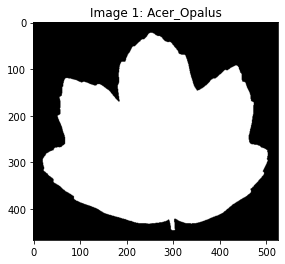

In [5]:
#draw image with id=1.
id = 1
plt.imshow(mpimg.imread("images/" + str(id) + ".jpg"), cmap="gray")
plt.title("Image " + str(id) + ": " + train_data[train_data["id"] == id].values[:,1][0]);

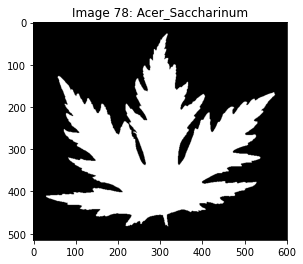

In [6]:
#draw image with id=78.
id = 78
plt.imshow(mpimg.imread("images/" + str(id) + ".jpg"), cmap="gray")
plt.title("Image " + str(id) + ": " + train_data[train_data["id"] == id].values[:,1][0]);

C:\Users\W1021H~1\AppData\Local\Temp/ipykernel_11028/3905546089.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(40,30))


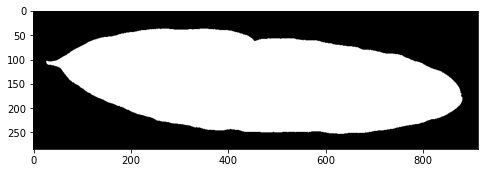

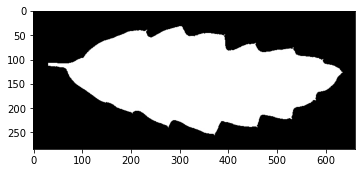

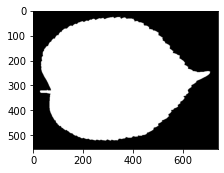

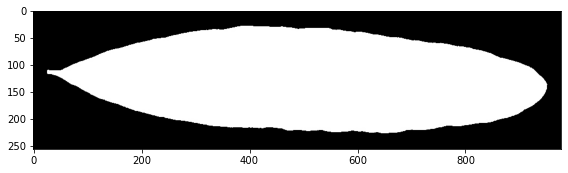

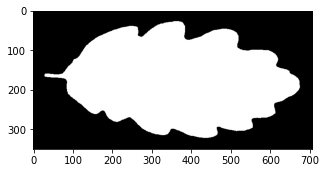

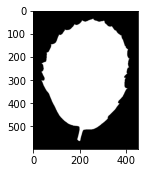

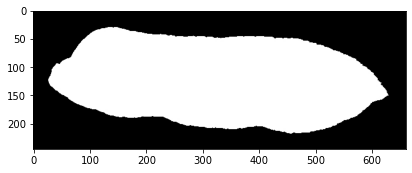

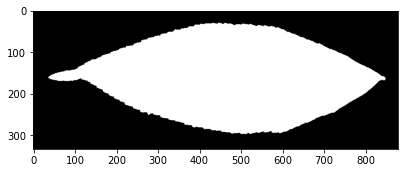

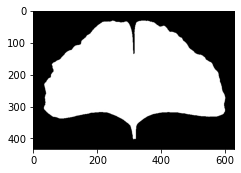

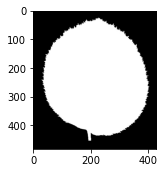

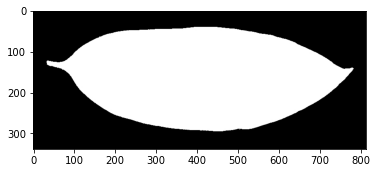

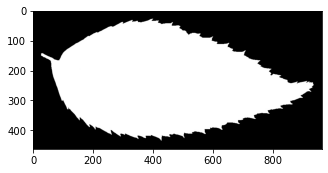

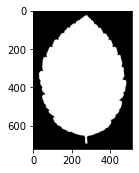

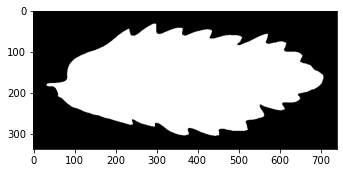

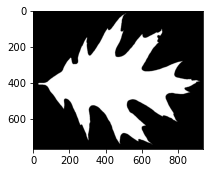

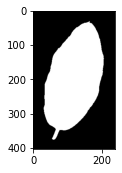

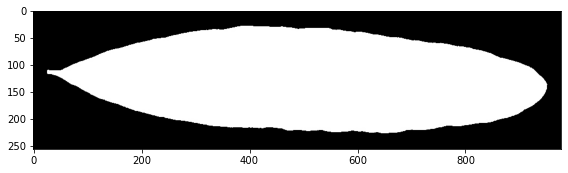

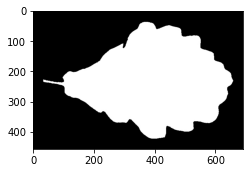

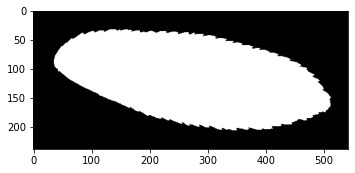

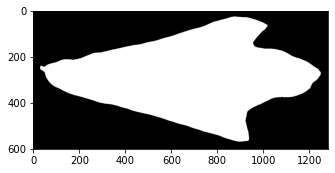

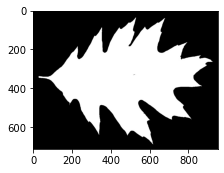

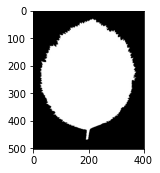

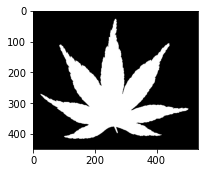

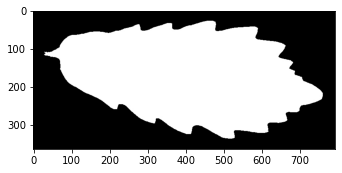

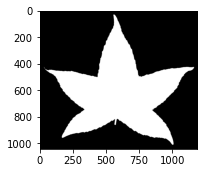

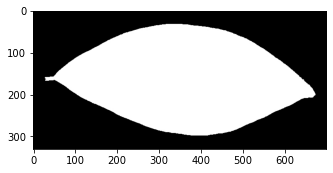

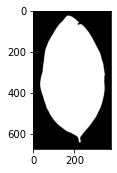

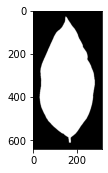

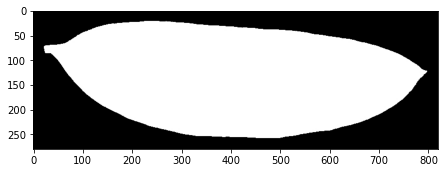

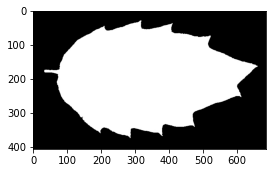

In [7]:
#draw some images randomly from the images file.
from tensorflow.keras.utils import load_img
for i in range(30):
    fig = plt.figure(figsize=(40,30))
    a=fig.add_subplot(10,3,i+1)
    j=np.random.choice((os.listdir('images')))
    img=load_img(os.path.join('images',j))
    plt.imshow(img)

### 1.4 data checking and preprocessing.

In [8]:
# list the data information.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [9]:
# describtion of the data.
train_data.describe()

id     margin1     margin2     margin3     margin4  \
count   990.000000  990.000000  990.000000  990.000000  990.000000   
mean    799.595960    0.017412    0.028539    0.031988    0.023280   
std     452.477568    0.019739    0.038855    0.025847    0.028411   
min       1.000000    0.000000    0.000000    0.000000    0.000000   
25%     415.250000    0.001953    0.001953    0.013672    0.005859   
50%     802.500000    0.009766    0.011719    0.025391    0.013672   
75%    1195.500000    0.025391    0.041016    0.044922    0.029297   
max    1584.000000    0.087891    0.205080    0.156250    0.169920   

          margin5     margin6     margin7     margin8     margin9  ...  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  ...   
mean     0.014264    0.038579    0.019202    0.001083    0.007167  ...   
std      0.018390    0.052030    0.017511    0.002743    0.008933  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      0.001953    0.000000    0.005859    0.000000    0.001953  ...   
50%      0.007812    0.015625    0.015625    0.000000    0.005859  ...   
75%      0.017578    0.056153    0.029297    0.000000    0.007812  ...   
max      0.111330    0.310550    0.091797    0.031250    0.076172  ...   

        texture55   texture56   texture57   texture58   texture59   texture60  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  990.000000   
mean     0.036501    0.005024    0.015944    0.011586    0.016108    0.014017   
std      0.063403    0.019321    0.023214    0.025040    0.015335    0.060151   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000977    0.000000    0.004883    0.000000   
50%      0.004883    0.000000    0.005859    0.000977    0.012695    0.000000   
75%      0.043701    0.000000    0.022217    0.009766    0.021484    0.000000   
max      0.429690    0.202150    0.172850    0.200200    0.106450    0.578130   

        texture61   texture62   texture63   texture64  
count  990.000000  990.000000  990.000000  990.000000  
mean     0.002688    0.020291    0.008989    0.019420  
std      0.011415    0.039040    0.013791    0.022768  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000977  
50%      0.000000    0.003906    0.002930    0.011719  
75%      0.000000    0.023438    0.012695    0.029297  
max      0.151370    0.375980    0.086914    0.141600  

[8 rows x 193 columns]

In [10]:
#check if there is any null value.
train_data.isnull().sum()

id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64

In [11]:
#check if there is any duplications
train_data.duplicated().sum()

0

In [12]:
# see species unique values.
train_data['species'].unique()

array(['Acer_Opalus', 'Pterocarya_Stenoptera', 'Quercus_Hartwissiana',
       'Tilia_Tomentosa', 'Quercus_Variabilis', 'Magnolia_Salicifolia',
       'Quercus_Canariensis', 'Quercus_Rubra', 'Quercus_Brantii',
       'Salix_Fragilis', 'Zelkova_Serrata', 'Betula_Austrosinensis',
       'Quercus_Pontica', 'Quercus_Afares', 'Quercus_Coccifera',
       'Fagus_Sylvatica', 'Phildelphus', 'Acer_Palmatum',
       'Quercus_Pubescens', 'Populus_Adenopoda', 'Quercus_Trojana',
       'Alnus_Sieboldiana', 'Quercus_Ilex', 'Arundinaria_Simonii',
       'Acer_Platanoids', 'Quercus_Phillyraeoides', 'Cornus_Chinensis',
       'Liriodendron_Tulipifera', 'Cytisus_Battandieri',
       'Rhododendron_x_Russellianum', 'Alnus_Rubra',
       'Eucalyptus_Glaucescens', 'Cercis_Siliquastrum',
       'Cotinus_Coggygria', 'Celtis_Koraiensis', 'Quercus_Crassifolia',
       'Quercus_Kewensis', 'Cornus_Controversa', 'Quercus_Pyrenaica',
       'Callicarpa_Bodinieri', 'Quercus_Alnifolia', 'Acer_Saccharinum',
       'Prun

In [13]:
#see the number of unique values in the species.
train_data['species'].nunique()

99

In [14]:
#see value counts of every unique value in species.
train_data['species'].value_counts()

Acer_Opalus                    10
Crataegus_Monogyna             10
Acer_Mono                      10
Magnolia_Heptapeta             10
Acer_Capillipes                10
                               ..
Alnus_Rubra                    10
Rhododendron_x_Russellianum    10
Cytisus_Battandieri            10
Liriodendron_Tulipifera        10
Sorbus_Aria                    10
Name: species, Length: 99, dtype: int64

In [15]:
# draw the colleration map to see the correlation between features.
corr_map = train_data.corr()
corr_map.style.background_gradient(cmap="Purples")

### 1.5 some visualiztions on train data.

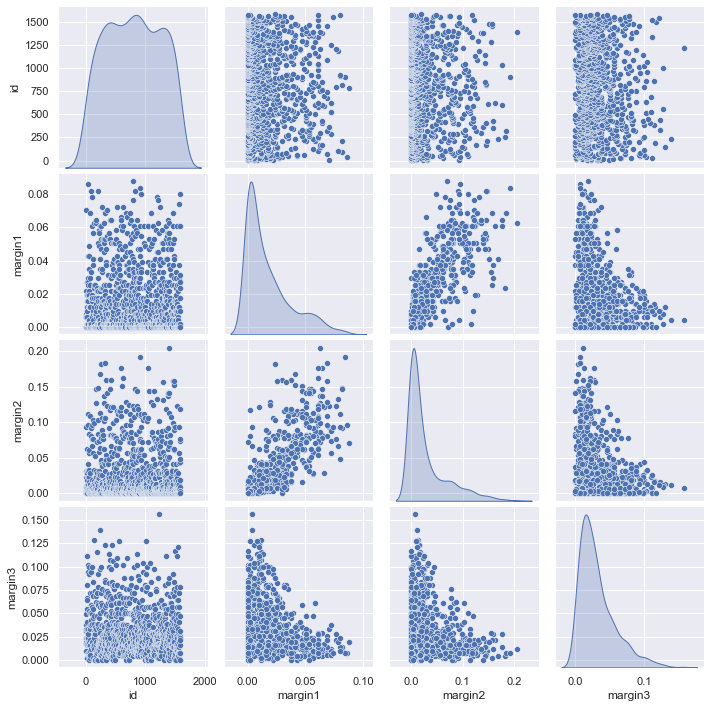

In [16]:
#to see some distribution of the features with each other.
sns.set(rc={'figure.figsize':(12,9)})
cData_attr = train_data.iloc[:, 0:5]
sns.pairplot(cData_attr, diag_kind='kde') 

<AxesSubplot:>

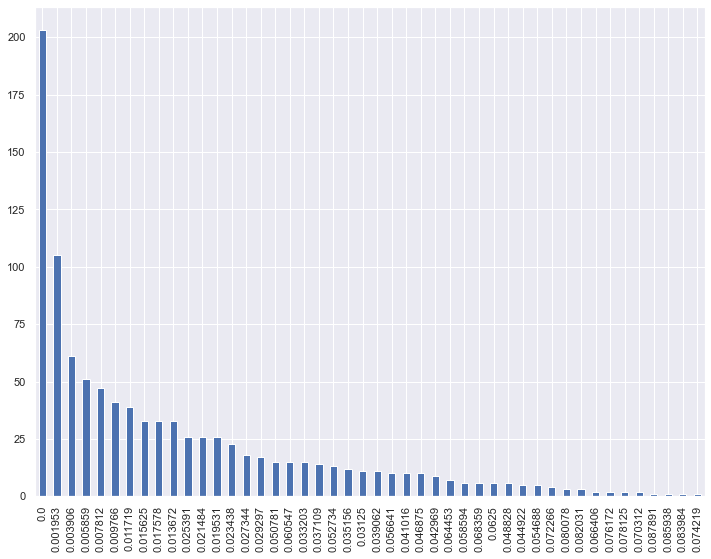

In [17]:
#see the margin 1 column bar plot of its values
train_data["margin1"].value_counts().plot(kind='bar')

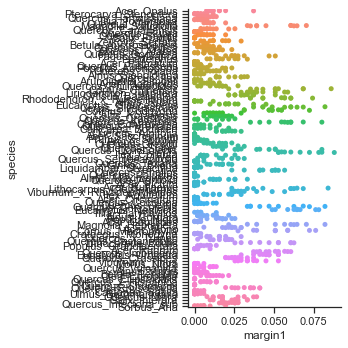

In [18]:
# margin1 w.r.t species
sns.set_theme(style="ticks", color_codes=True)

sns.catplot(x="margin1", y="species", data=train_data)

## 2. Label encoding, normalize, and split the data into train and test.

In [19]:
X = train_data.drop(["id", "species"], axis = 1, inplace = False).values
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(train_data["species"].values)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train

array([[-0.68359611, -0.73095916, -0.53338158, ...,  1.85223123,
        -0.45590536, -0.85795418],
       [-0.88059944, -0.73095916, -1.07407824, ...,  0.11664222,
        -0.66607024, -0.35255267],
       [-0.78209778, -0.68146085,  0.00731508, ..., -0.35445674,
         2.48604437,  2.25863812],
       ...,
       [ 2.37015724,  2.73417625, -0.76509177, ..., -0.20567528,
        -0.66607024,  2.38495615],
       [-0.88059944, -0.73095916, -0.8423285 , ...,  2.3977717 ,
        -0.17573333, -0.85795418],
       [-0.78209778, -0.58246422, -0.91960478, ..., -0.1808953 ,
         0.45468959,  0.57398081]])

In [21]:
y_train

array([17,  8, 69,  9,  3, 30, 56, 86, 33, 82, 41, 34, 49, 21, 88, 27, 29,
        6, 96, 47,  4, 86, 94, 83, 10, 57, 50,  8, 70, 47, 13, 64, 37, 51,
       42, 17, 10, 65, 54, 48,  9, 25, 80, 44, 40, 83, 58,  6, 80, 62, 53,
       79, 73, 37,  2,  1, 76, 95, 35, 86,  7, 68, 83,  0, 85, 39, 37, 92,
       23, 89, 98, 43, 18, 46, 50, 97, 21, 14, 35, 72, 85,  3, 60, 27, 43,
       98, 49, 27, 35, 40, 36,  6, 78, 43, 47, 89,  7, 86, 95,  9,  1, 73,
       38, 11, 68, 19, 18, 41, 72, 78, 71, 77, 25, 11, 83,  1, 95, 65, 79,
       15, 36, 93, 30, 59,  5, 61,  3, 51, 72, 96, 56,  8, 16, 54, 41, 87,
       58, 96, 65, 59, 48, 83, 15, 63, 84, 77, 45, 12, 42, 98,  9, 57, 76,
       38, 68,  2, 73,  2, 76, 17, 10, 76, 66, 74, 87, 54,  2, 50, 60, 65,
       82, 46, 40, 58, 51, 13, 95, 47,  7, 81, 64,  4, 65,  4, 15, 88, 58,
       26, 26, 11, 34, 15, 39, 69, 13, 16, 17, 97, 47, 71, 12, 34, 94, 82,
       48, 65, 23, 82, 86, 78, 75, 97, 91, 10, 90, 59,  5, 88, 34, 74, 24,
       50, 21, 96, 94, 74

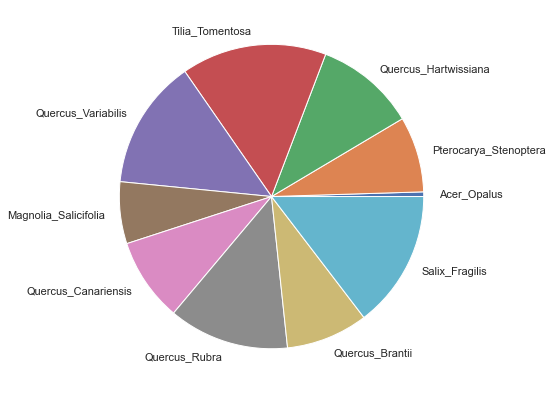

In [22]:
#visualization of labels.
fig = plt.figure(figsize =(10, 7))
plt.pie(y[:10],labels=train_data['species'][:10]);

## 3. build the evaluation_model function.

In [23]:
# this function take hyperparameters like: batch size, hidden layers, optimizers, dropout, learning_rate and regulazation as input.
# these hyperparameter takes a defult value in the function so that if any value changed in the call the rest stay the same.
#this function build,compile,fit,evaluate and draw training curves.
def evaluate_diff_model(batch_size = 16, hidden_layer = 384, optimizer = "Adam", dropout = 0.5, 
                        learning_rate = 0.01, regularization = 0.01):
    model = tf.keras.Sequential() #to build the model.
    model.add(tf.keras.Input(shape=(192,)))#number of hidden units=number of features.
    model.add(tf.keras.layers.Dense(hidden_layer, activation = "tanh"))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(99, activation = "softmax"))#number of hidden units=number of labels.
    if optimizer == "Adam":
        opt = tf.keras.optimizers.Adam(learning_rate = learning_rate, weight_decay = regularization)
    elif optimizer == "SGD":
        opt = tf.keras.optimizers.SGD(learning_rate = learning_rate, weight_decay = regularization)
    elif optimizer == "RMSprop":
        opt = tf.keras.optimizers.RMSprop(learning_rate = learning_rate, weight_decay = regularization)
    else:
        print("Invalid Optimizer Name")
        return
    model.compile(optimizer = opt, loss = "SparseCategoricalCrossentropy", metrics = ["accuracy"])# to compile the model.
    EarlyStop = tf.keras.callbacks.EarlyStopping(patience = 10)

    history = model.fit(X_train, y_train, batch_size = batch_size ,epochs = 1000, verbose = True, 
                        validation_data = (X_test, y_test), callbacks=[EarlyStop]) #fit the model.
    print("model evaluation on test data")
    model.evaluate(X_test, y_test);#evaluate the model.
    
    fig, axes = plt.subplots(2,1, figsize = [16, 16])
    axes[0].plot(history.history['accuracy'])
    try:
        axes[0].plot(history.history['val_accuracy'])
        axes[0].legend(['Train', 'Val'])
    except:
        pass
    axes[0].set_title('{:s}'.format('accuracy'))
    axes[0].set_ylabel('{:s}'.format('accuracy'))
    axes[0].set_xlabel('Epoch')
    fig.subplots_adjust(hspace=0.5)
    axes[1].plot(history.history['loss'])
    try:
        axes[1].plot(history.history['val_loss'])
        axes[1].legend(['Train', 'Val'])
    except:
        pass
    axes[1].set_title('Model Loss')
    axes[1].set_ylabel('Loss')
    axes[1].set_xlabel('Epoch')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')

## 4. train the model with different hyperparameters.

### 4.1 hyperparameter1: evaluate model with different optimizers : Adam, SGD, RMSprop

Epoch 1/1000
50/50 [==============================] - 2s 12ms/step - loss: 2.5164 - accuracy: 0.4634 - val_loss: 0.8178 - val_accuracy: 0.7727
Epoch 2/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.7146 - accuracy: 0.7942 - val_loss: 0.5525 - val_accuracy: 0.8788
Epoch 3/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.5713 - accuracy: 0.8662 - val_loss: 0.5767 - val_accuracy: 0.8788
Epoch 4/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.4299 - accuracy: 0.9003 - val_loss: 0.3989 - val_accuracy: 0.8586
Epoch 5/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.3894 - accuracy: 0.8902 - val_loss: 0.2741 - val_accuracy: 0.9293
Epoch 6/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.5167 - accuracy: 0.8737 - val_loss: 0.2370 - val_accuracy: 0.9394
Epoch 7/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.4513 - accuracy: 0.9040 - val_loss: 0.3347 - val_accuracy: 0.9293
Epoch

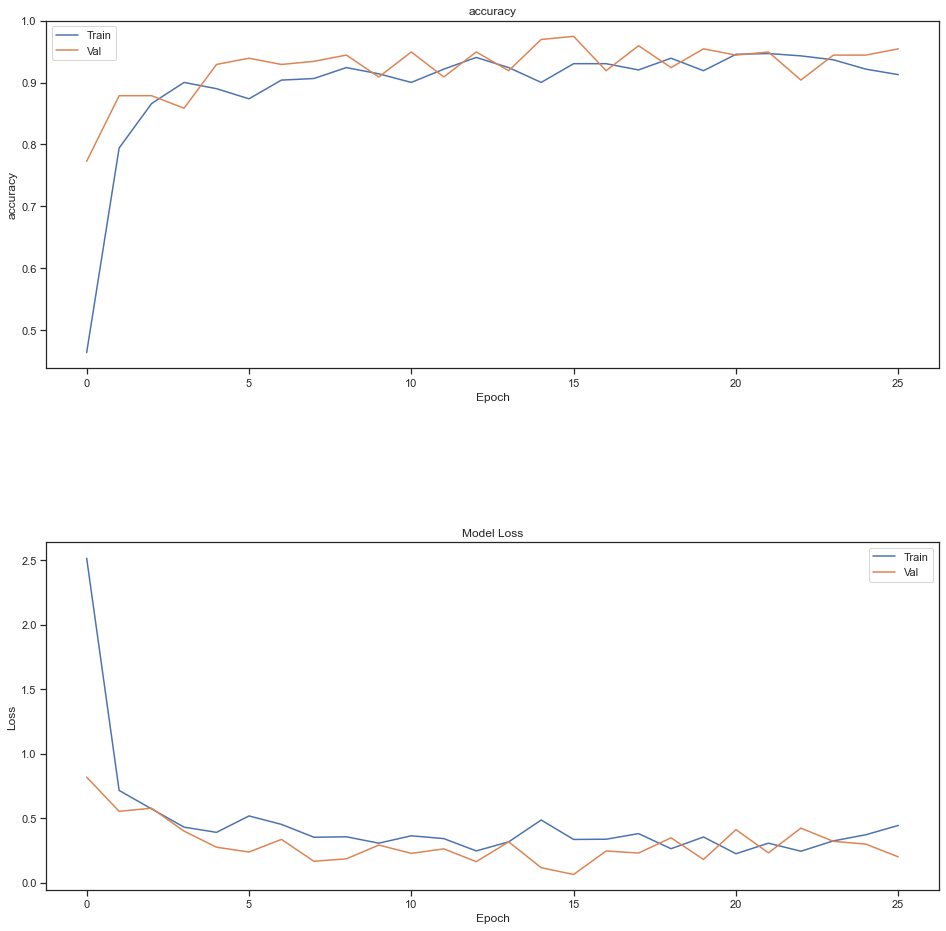

In [24]:
# it will evaluate using adam by default.
evaluate_diff_model()

Epoch 1/1000
50/50 [==============================] - 1s 13ms/step - loss: 4.6295 - accuracy: 0.0366 - val_loss: 3.9594 - val_accuracy: 0.0960
Epoch 2/1000
50/50 [==============================] - 0s 6ms/step - loss: 3.7835 - accuracy: 0.1402 - val_loss: 3.3440 - val_accuracy: 0.3030
Epoch 3/1000
50/50 [==============================] - 0s 6ms/step - loss: 3.1286 - accuracy: 0.2955 - val_loss: 2.8596 - val_accuracy: 0.5202
Epoch 4/1000
50/50 [==============================] - 0s 6ms/step - loss: 2.5962 - accuracy: 0.4672 - val_loss: 2.4661 - val_accuracy: 0.6414
Epoch 5/1000
50/50 [==============================] - 0s 6ms/step - loss: 2.1635 - accuracy: 0.6086 - val_loss: 2.1559 - val_accuracy: 0.7576
Epoch 6/1000
50/50 [==============================] - 0s 6ms/step - loss: 1.8558 - accuracy: 0.6894 - val_loss: 1.8940 - val_accuracy: 0.7879
Epoch 7/1000
50/50 [==============================] - 0s 6ms/step - loss: 1.6198 - accuracy: 0.7424 - val_loss: 1.6795 - val_accuracy: 0.8131
Epoch

50/50 [==============================] - 0s 6ms/step - loss: 0.2219 - accuracy: 0.9975 - val_loss: 0.3234 - val_accuracy: 0.9949
Epoch 59/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.2190 - accuracy: 0.9987 - val_loss: 0.3212 - val_accuracy: 0.9949
Epoch 60/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.2239 - accuracy: 0.9975 - val_loss: 0.3184 - val_accuracy: 0.9949
Epoch 61/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.2167 - accuracy: 0.9975 - val_loss: 0.3170 - val_accuracy: 0.9899
Epoch 62/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.2161 - accuracy: 0.9962 - val_loss: 0.3174 - val_accuracy: 0.9899
Epoch 63/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.2200 - accuracy: 0.9962 - val_loss: 0.3159 - val_accuracy: 0.9899
Epoch 64/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.2068 - accuracy: 0.9987 - val_loss: 0.3152 - val_accuracy: 0.9899
Epoch 65/1000

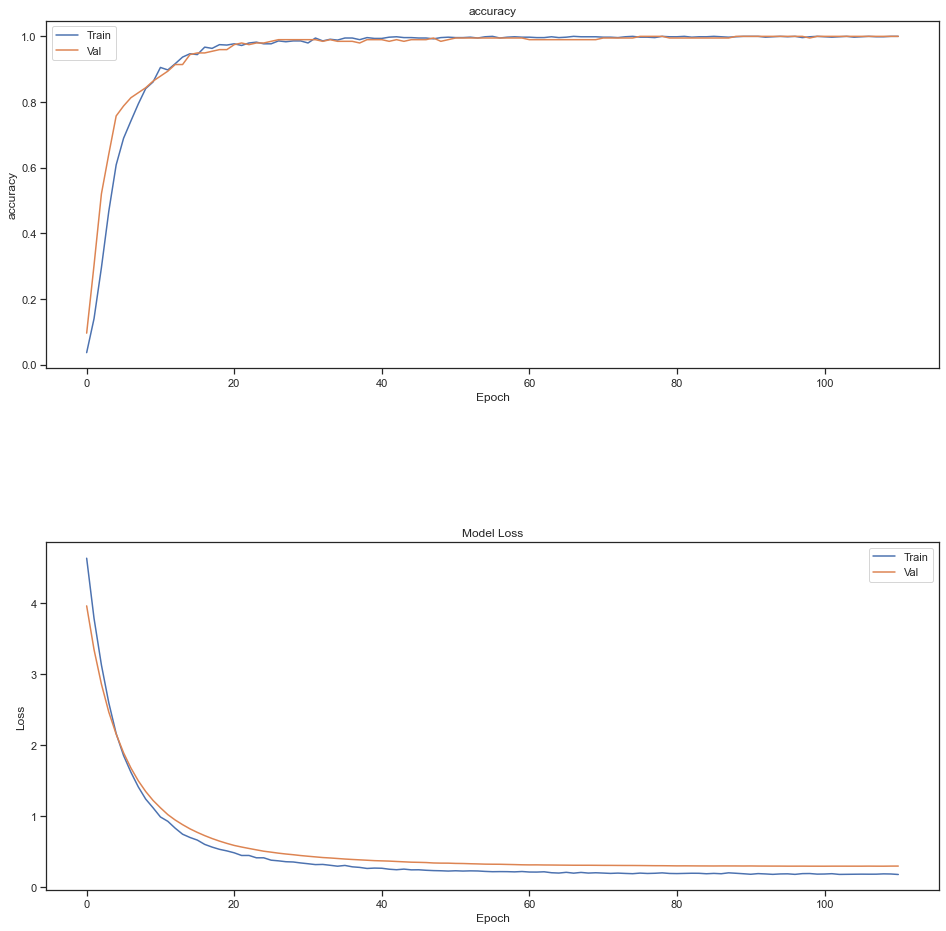

In [25]:
# using SGD
evaluate_diff_model(optimizer = "SGD")

Epoch 1/1000
50/50 [==============================] - 1s 12ms/step - loss: 2.8463 - accuracy: 0.3977 - val_loss: 0.9023 - val_accuracy: 0.7778
Epoch 2/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.8003 - accuracy: 0.7828 - val_loss: 0.3605 - val_accuracy: 0.9091
Epoch 3/1000
50/50 [==============================] - 0s 7ms/step - loss: 0.4848 - accuracy: 0.8598 - val_loss: 0.2614 - val_accuracy: 0.9293
Epoch 4/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.3069 - accuracy: 0.9040 - val_loss: 0.4217 - val_accuracy: 0.8737
Epoch 5/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.2458 - accuracy: 0.9242 - val_loss: 0.2453 - val_accuracy: 0.9091
Epoch 6/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.2232 - accuracy: 0.9407 - val_loss: 0.1401 - val_accuracy: 0.9545
Epoch 7/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.1439 - accuracy: 0.9710 - val_loss: 0.0998 - val_accuracy: 0.9747
Epoch

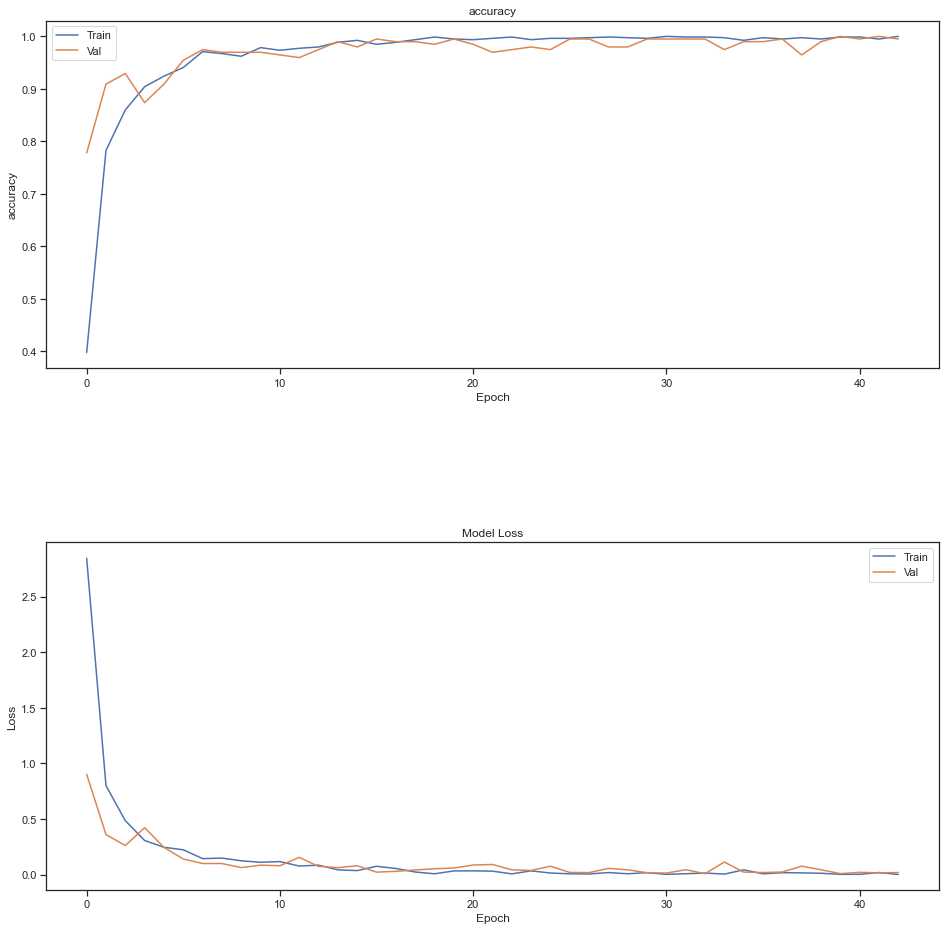

In [26]:
evaluate_diff_model(optimizer = "RMSprop")

### 4.2 hyperparameter2: evaluate model with different dropout: 0.2, 0.4, 0.6

Epoch 1/1000
50/50 [==============================] - 1s 10ms/step - loss: 1.9834 - accuracy: 0.5745 - val_loss: 0.8097 - val_accuracy: 0.8586
Epoch 2/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.4194 - accuracy: 0.8914 - val_loss: 0.4037 - val_accuracy: 0.8990
Epoch 3/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.2658 - accuracy: 0.9255 - val_loss: 0.2781 - val_accuracy: 0.9192
Epoch 4/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.2902 - accuracy: 0.9369 - val_loss: 0.1928 - val_accuracy: 0.9444
Epoch 5/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.1891 - accuracy: 0.9571 - val_loss: 0.3787 - val_accuracy: 0.8687
Epoch 6/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.1588 - accuracy: 0.9583 - val_loss: 0.2195 - val_accuracy: 0.9444
Epoch 7/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.1241 - accuracy: 0.9722 - val_loss: 0.2749 - val_accuracy: 0.9091
Epoch

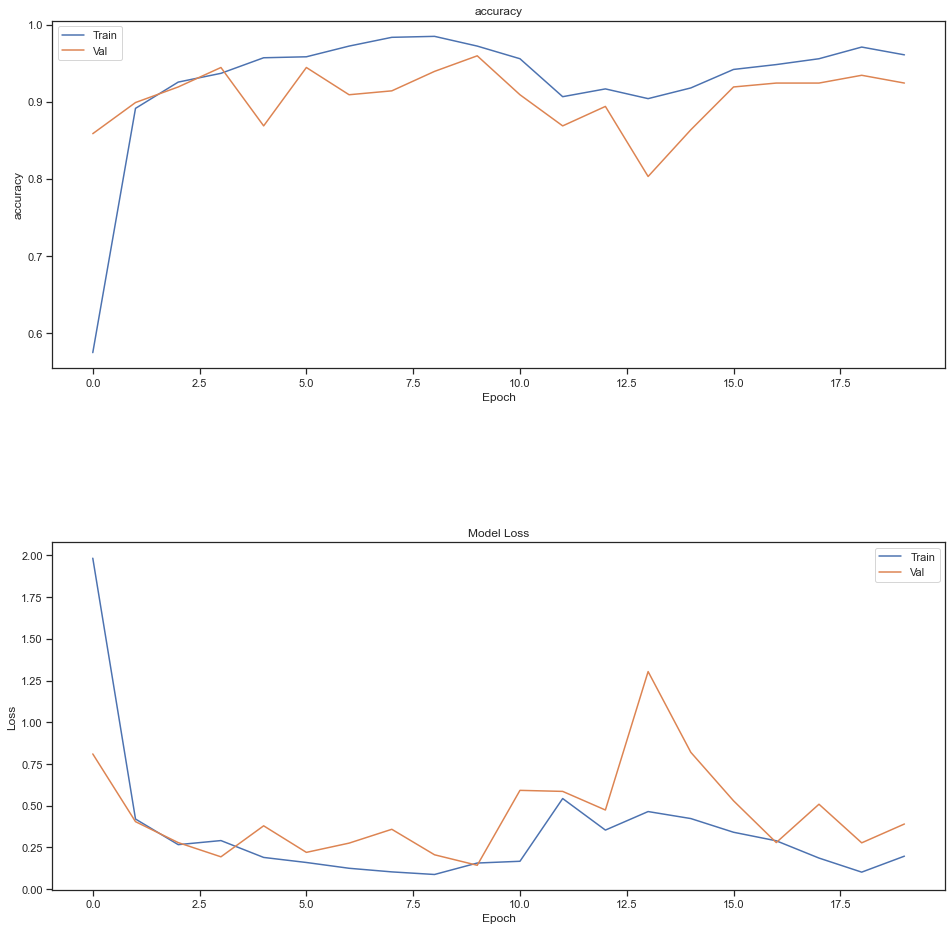

In [27]:
evaluate_diff_model(dropout = 0.2)

Epoch 1/1000
50/50 [==============================] - 2s 12ms/step - loss: 2.2529 - accuracy: 0.5265 - val_loss: 0.5886 - val_accuracy: 0.8333
Epoch 2/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.4506 - accuracy: 0.8763 - val_loss: 0.5064 - val_accuracy: 0.8838
Epoch 3/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.4567 - accuracy: 0.8788 - val_loss: 0.7571 - val_accuracy: 0.8838
Epoch 4/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.4609 - accuracy: 0.8876 - val_loss: 0.3328 - val_accuracy: 0.9293
Epoch 5/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.2305 - accuracy: 0.9356 - val_loss: 0.3314 - val_accuracy: 0.9040
Epoch 6/1000
50/50 [==============================] - 0s 7ms/step - loss: 0.4025 - accuracy: 0.9066 - val_loss: 0.2630 - val_accuracy: 0.9141
Epoch 7/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.2426 - accuracy: 0.9306 - val_loss: 0.3337 - val_accuracy: 0.9192
Epoch

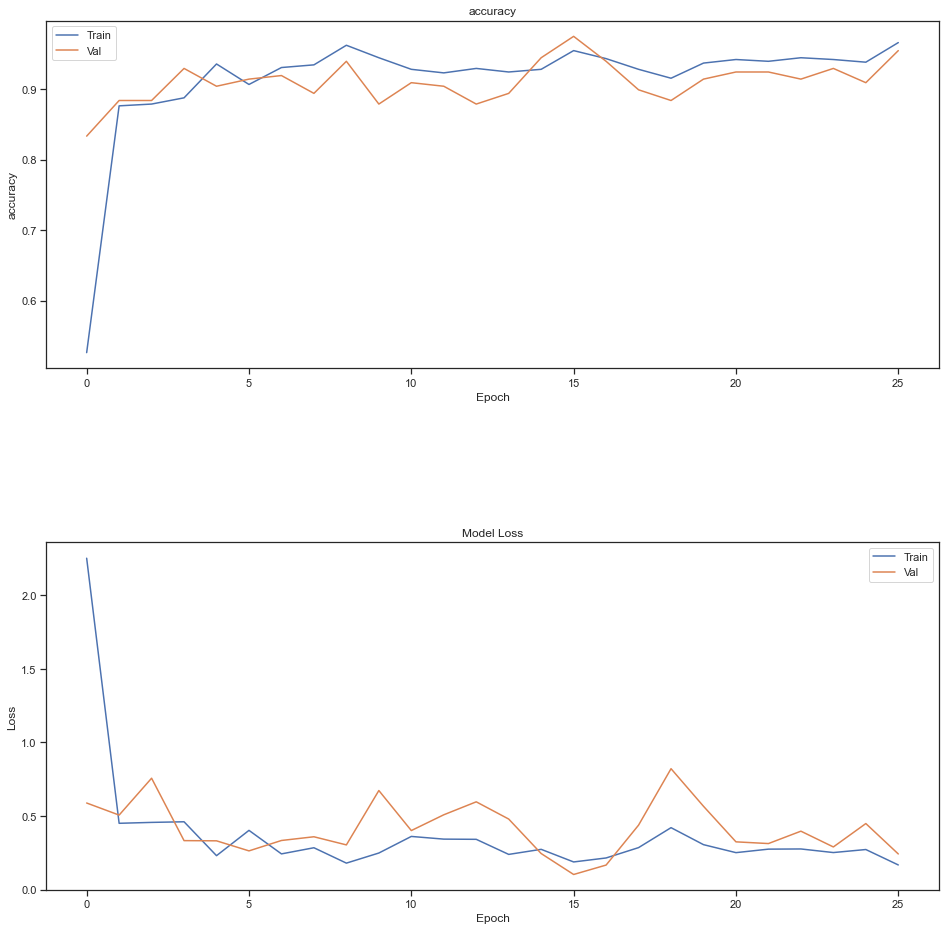

In [28]:
evaluate_diff_model(dropout = 0.4)

Epoch 1/1000
50/50 [==============================] - 2s 12ms/step - loss: 2.9375 - accuracy: 0.3775 - val_loss: 0.8631 - val_accuracy: 0.7980
Epoch 2/1000
50/50 [==============================] - 0s 7ms/step - loss: 1.0248 - accuracy: 0.7412 - val_loss: 0.5204 - val_accuracy: 0.8434
Epoch 3/1000
50/50 [==============================] - 0s 7ms/step - loss: 0.6134 - accuracy: 0.8523 - val_loss: 0.4800 - val_accuracy: 0.8737
Epoch 4/1000
50/50 [==============================] - 0s 7ms/step - loss: 0.5681 - accuracy: 0.8523 - val_loss: 0.4871 - val_accuracy: 0.8687
Epoch 5/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.5633 - accuracy: 0.8598 - val_loss: 0.1686 - val_accuracy: 0.9293
Epoch 6/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.4482 - accuracy: 0.8801 - val_loss: 0.3898 - val_accuracy: 0.8788
Epoch 7/1000
50/50 [==============================] - 0s 7ms/step - loss: 0.6941 - accuracy: 0.8472 - val_loss: 0.4766 - val_accuracy: 0.9040
Epoch

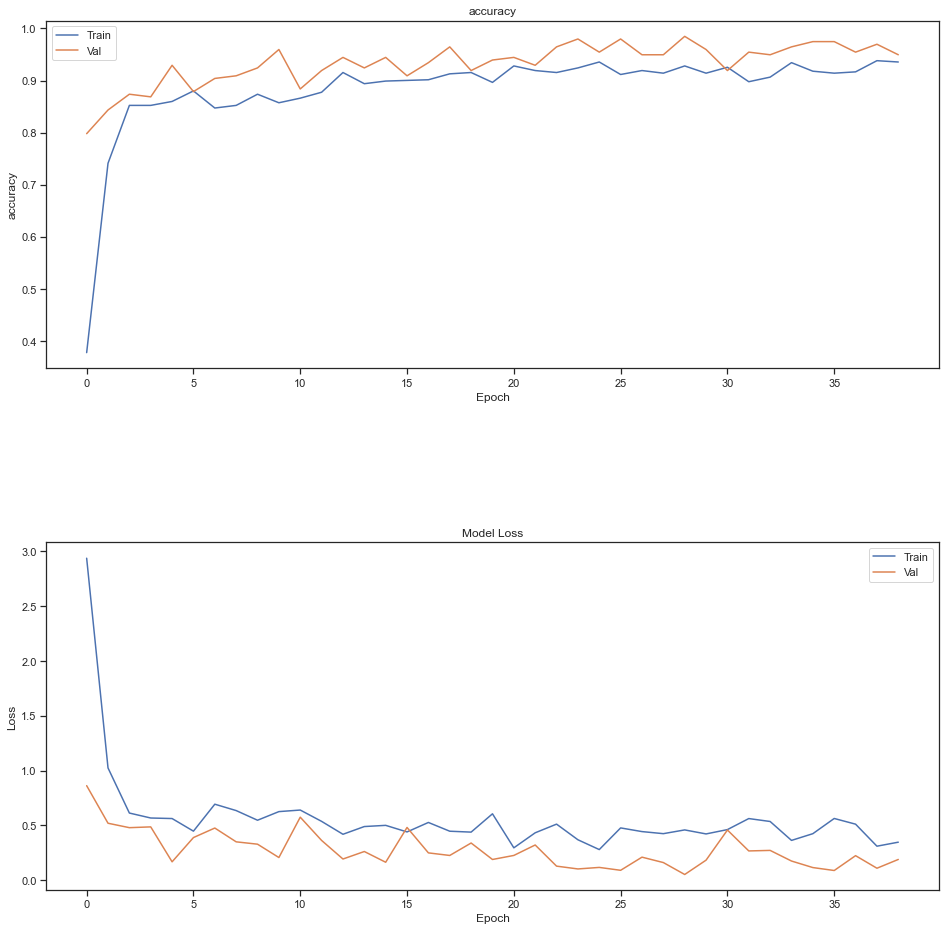

In [29]:
evaluate_diff_model(dropout = 0.6)

### 4.3 hyperparameter3: evaluate model with different hidden layer units number: 128, 256, 512 

Epoch 1/1000
50/50 [==============================] - 2s 11ms/step - loss: 2.8739 - accuracy: 0.3586 - val_loss: 0.9570 - val_accuracy: 0.7677
Epoch 2/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.6674 - accuracy: 0.8371 - val_loss: 0.3903 - val_accuracy: 0.9040
Epoch 3/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.3874 - accuracy: 0.8977 - val_loss: 0.2535 - val_accuracy: 0.9192
Epoch 4/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.3046 - accuracy: 0.9280 - val_loss: 0.1752 - val_accuracy: 0.9697
Epoch 5/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.2102 - accuracy: 0.9457 - val_loss: 0.1875 - val_accuracy: 0.9394
Epoch 6/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.1701 - accuracy: 0.9520 - val_loss: 0.1548 - val_accuracy: 0.9545
Epoch 7/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.1552 - accuracy: 0.9571 - val_loss: 0.1346 - val_accuracy: 0.9596
Epoch

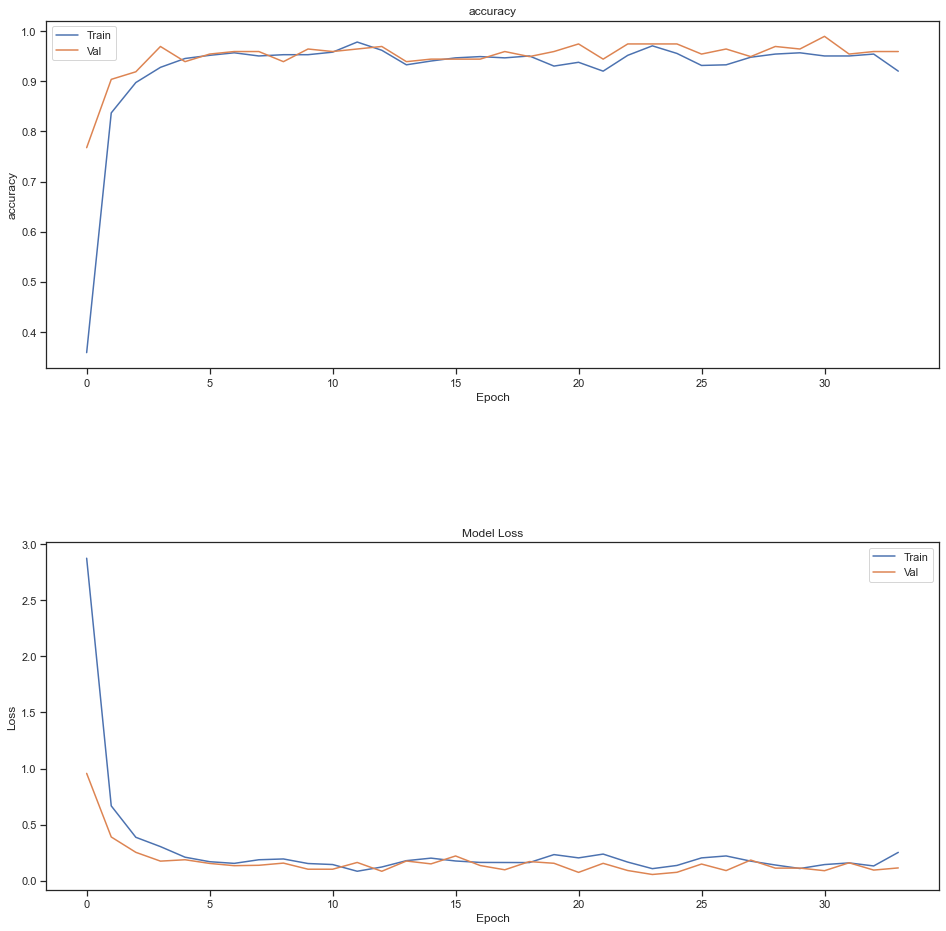

In [30]:
evaluate_diff_model(hidden_layer = 128)

Epoch 1/1000
50/50 [==============================] - 2s 10ms/step - loss: 2.5817 - accuracy: 0.4179 - val_loss: 0.9000 - val_accuracy: 0.7071
Epoch 2/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.6792 - accuracy: 0.8093 - val_loss: 0.3542 - val_accuracy: 0.8687
Epoch 3/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.4495 - accuracy: 0.8687 - val_loss: 0.3153 - val_accuracy: 0.9343
Epoch 4/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.3154 - accuracy: 0.9141 - val_loss: 0.1972 - val_accuracy: 0.9444
Epoch 5/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.2521 - accuracy: 0.9343 - val_loss: 0.1542 - val_accuracy: 0.9545
Epoch 6/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.2858 - accuracy: 0.9015 - val_loss: 0.2086 - val_accuracy: 0.9343
Epoch 7/1000
50/50 [==============================] - 0s 5ms/step - loss: 0.2835 - accuracy: 0.9230 - val_loss: 0.1796 - val_accuracy: 0.9646
Epoch

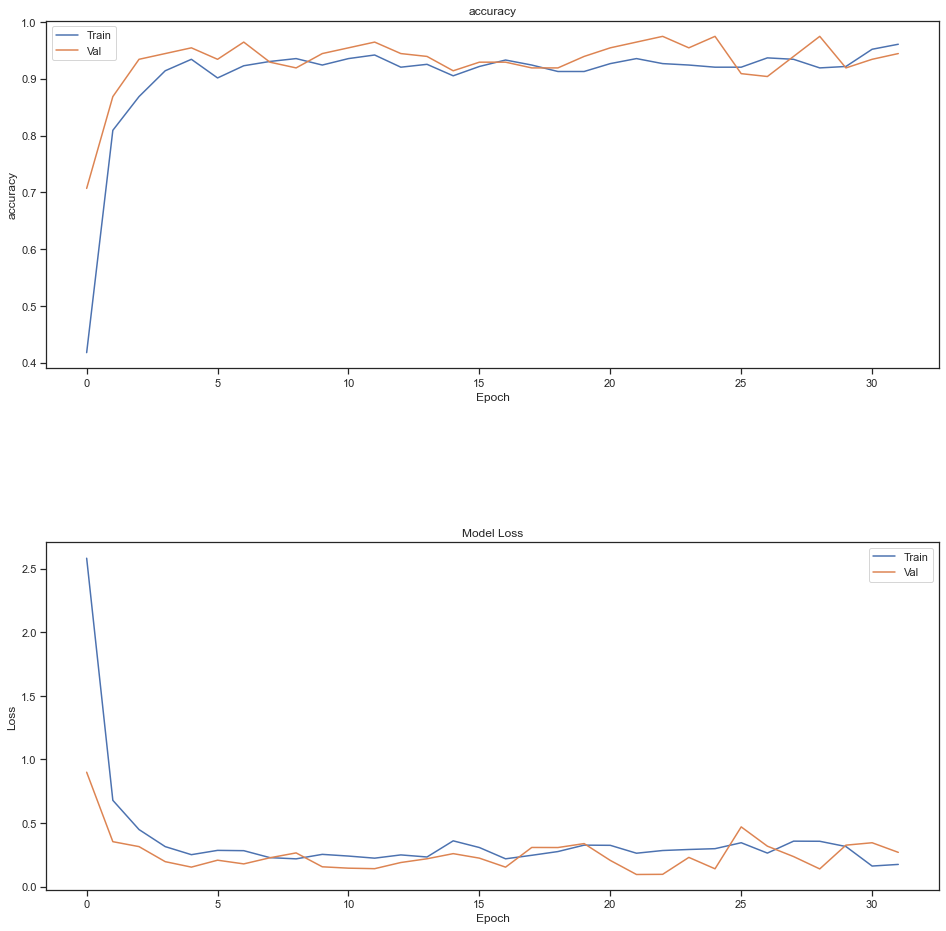

In [31]:
evaluate_diff_model(hidden_layer = 256)

Epoch 1/1000
50/50 [==============================] - 2s 11ms/step - loss: 2.6999 - accuracy: 0.4520 - val_loss: 1.0011 - val_accuracy: 0.7020
Epoch 2/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.8987 - accuracy: 0.7879 - val_loss: 0.6193 - val_accuracy: 0.8333
Epoch 3/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.8181 - accuracy: 0.8194 - val_loss: 1.0375 - val_accuracy: 0.8283
Epoch 4/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.7021 - accuracy: 0.8636 - val_loss: 0.8042 - val_accuracy: 0.8434
Epoch 5/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.5913 - accuracy: 0.8725 - val_loss: 0.5026 - val_accuracy: 0.8788
Epoch 6/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.4167 - accuracy: 0.8977 - val_loss: 0.5801 - val_accuracy: 0.8636
Epoch 7/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.3946 - accuracy: 0.9167 - val_loss: 0.1364 - val_accuracy: 0.9444
Epoch

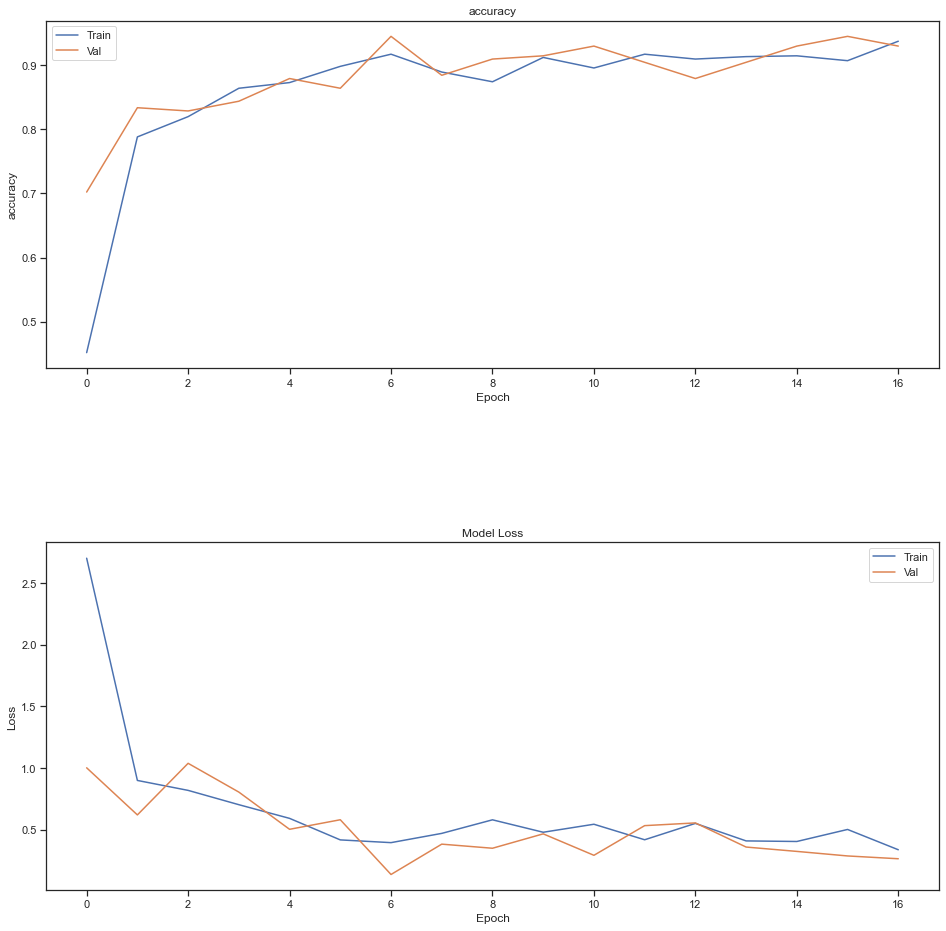

In [32]:
evaluate_diff_model(hidden_layer = 512)

### 4.4 hyperparameter4: evaluate model with different batch size: 16, 32, 64

Epoch 1/1000
50/50 [==============================] - 1s 10ms/step - loss: 2.5108 - accuracy: 0.4432 - val_loss: 0.7623 - val_accuracy: 0.8081
Epoch 2/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.6736 - accuracy: 0.8245 - val_loss: 0.5848 - val_accuracy: 0.8586
Epoch 3/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.4980 - accuracy: 0.8687 - val_loss: 0.4599 - val_accuracy: 0.8636
Epoch 4/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.3779 - accuracy: 0.8952 - val_loss: 0.7891 - val_accuracy: 0.8737
Epoch 5/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.4772 - accuracy: 0.8851 - val_loss: 0.4636 - val_accuracy: 0.9192
Epoch 6/1000
50/50 [==============================] - 0s 6ms/step - loss: 0.5374 - accuracy: 0.8788 - val_loss: 0.2835 - val_accuracy: 0.9293
Epoch 7/1000
50/50 [==============================] - 0s 7ms/step - loss: 0.4376 - accuracy: 0.8939 - val_loss: 0.2510 - val_accuracy: 0.9343
Epoch

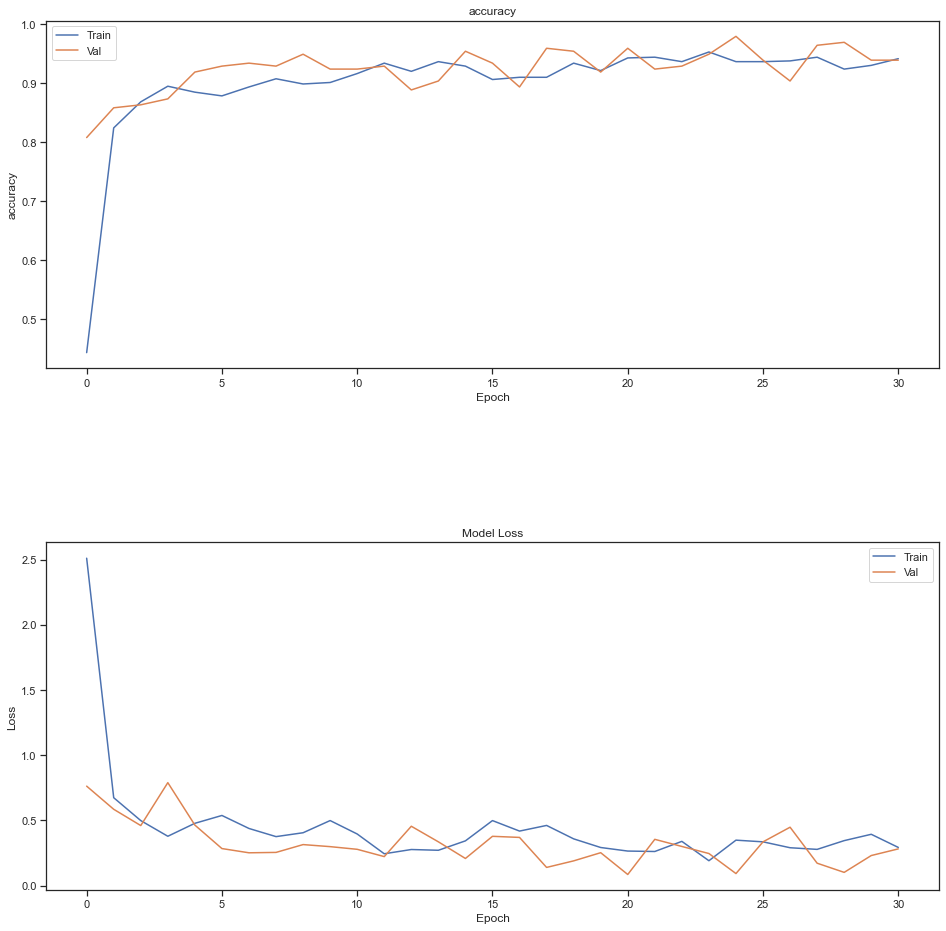

In [33]:
 evaluate_diff_model(batch_size = 16)

Epoch 1/1000
25/25 [==============================] - 1s 17ms/step - loss: 2.5242 - accuracy: 0.4533 - val_loss: 1.1222 - val_accuracy: 0.7677
Epoch 2/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.5125 - accuracy: 0.8485 - val_loss: 0.2168 - val_accuracy: 0.9394
Epoch 3/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.2588 - accuracy: 0.9230 - val_loss: 0.1520 - val_accuracy: 0.9545
Epoch 4/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.2340 - accuracy: 0.9432 - val_loss: 0.2382 - val_accuracy: 0.9343
Epoch 5/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.1560 - accuracy: 0.9533 - val_loss: 0.1171 - val_accuracy: 0.9646
Epoch 6/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.1349 - accuracy: 0.9571 - val_loss: 0.1799 - val_accuracy: 0.9444
Epoch 7/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.1208 - accuracy: 0.9684 - val_loss: 0.0786 - val_accuracy: 0.9697
Epoch

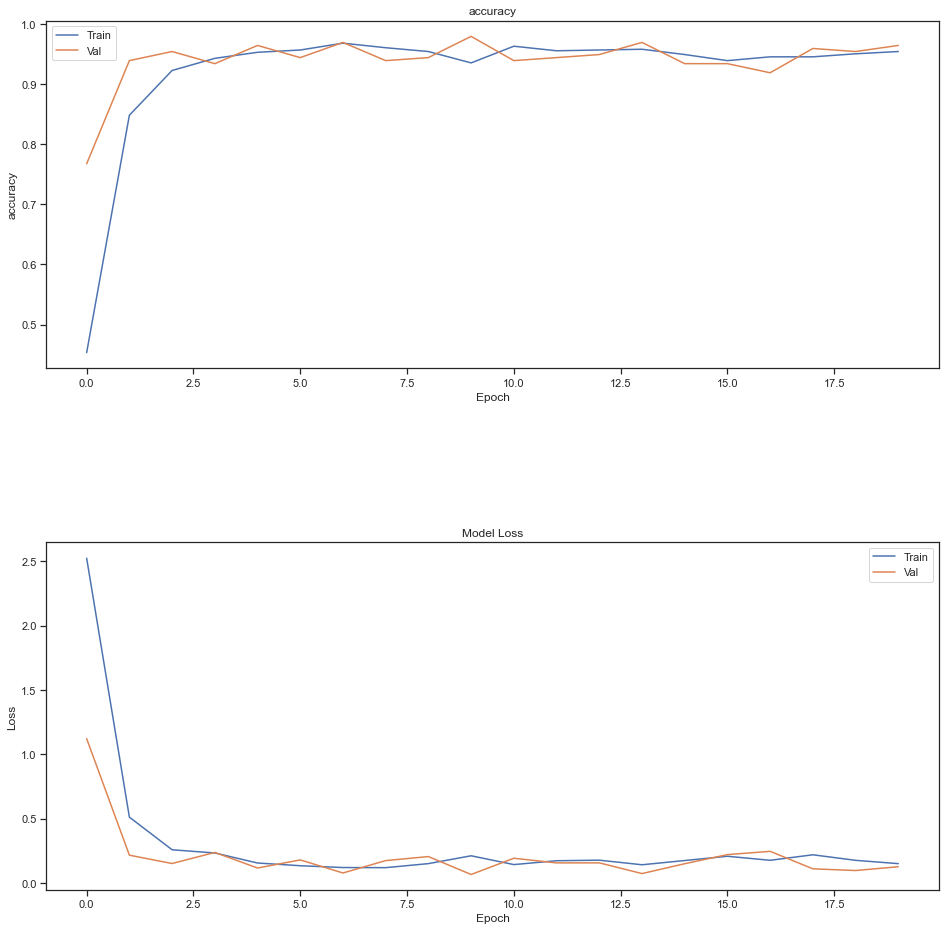

In [34]:
evaluate_diff_model(batch_size = 32)

Epoch 1/1000
13/13 [==============================] - 1s 30ms/step - loss: 2.6598 - accuracy: 0.4129 - val_loss: 0.7794 - val_accuracy: 0.7778
Epoch 2/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.4866 - accuracy: 0.8510 - val_loss: 0.2290 - val_accuracy: 0.9192
Epoch 3/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.1688 - accuracy: 0.9520 - val_loss: 0.1295 - val_accuracy: 0.9444
Epoch 4/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.0867 - accuracy: 0.9773 - val_loss: 0.1939 - val_accuracy: 0.9545
Epoch 5/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.1089 - accuracy: 0.9710 - val_loss: 0.0709 - val_accuracy: 0.9848
Epoch 6/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.0756 - accuracy: 0.9811 - val_loss: 0.0789 - val_accuracy: 0.9798
Epoch 7/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.0529 - accuracy: 0.9811 - val_loss: 0.0806 - val_accuracy: 0.9747


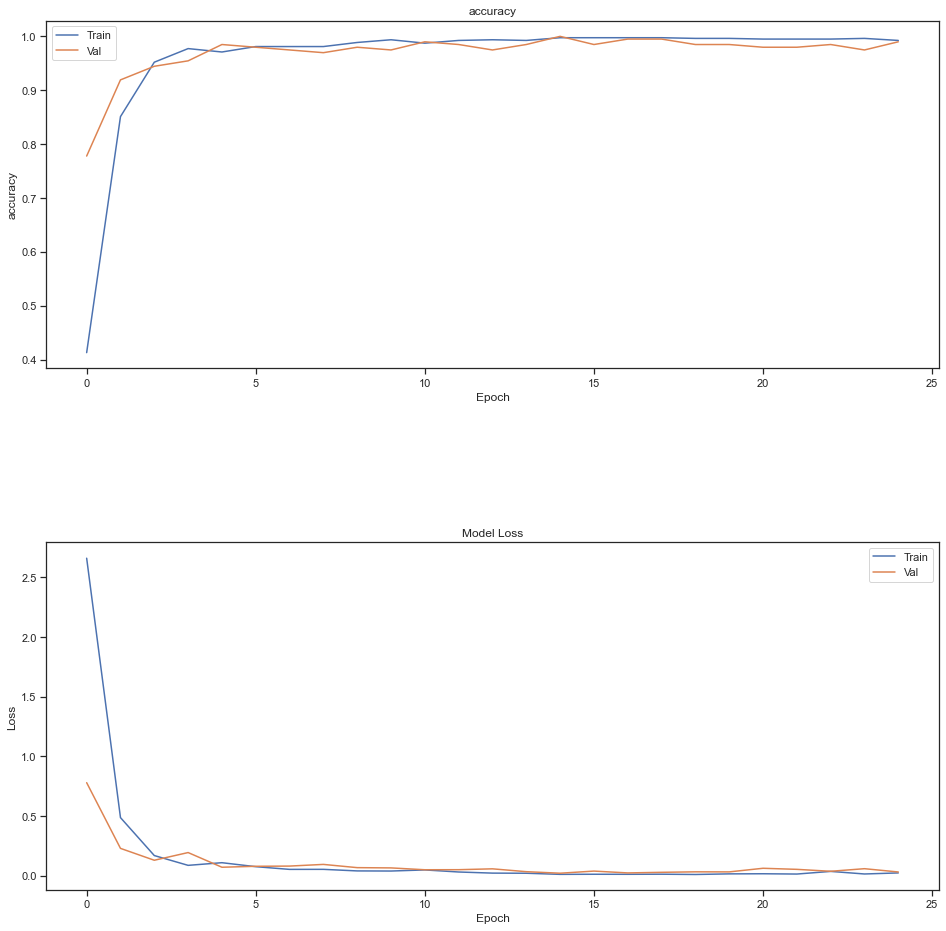

In [35]:
evaluate_diff_model(batch_size = 64)

## 5. best model.

Epoch 1/1000
13/13 [==============================] - 1s 31ms/step - loss: 2.7953 - accuracy: 0.3838 - val_loss: 1.1550 - val_accuracy: 0.7778
Epoch 2/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.7751 - accuracy: 0.8447 - val_loss: 0.4815 - val_accuracy: 0.9293
Epoch 3/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.3461 - accuracy: 0.9343 - val_loss: 0.2989 - val_accuracy: 0.9545
Epoch 4/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.1964 - accuracy: 0.9710 - val_loss: 0.2170 - val_accuracy: 0.9545
Epoch 5/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.1289 - accuracy: 0.9823 - val_loss: 0.1118 - val_accuracy: 0.9899
Epoch 6/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.0801 - accuracy: 0.9912 - val_loss: 0.1810 - val_accuracy: 0.9444
Epoch 7/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.0646 - accuracy: 0.9912 - val_loss: 0.0830 - val_accuracy: 0.9798
Epo

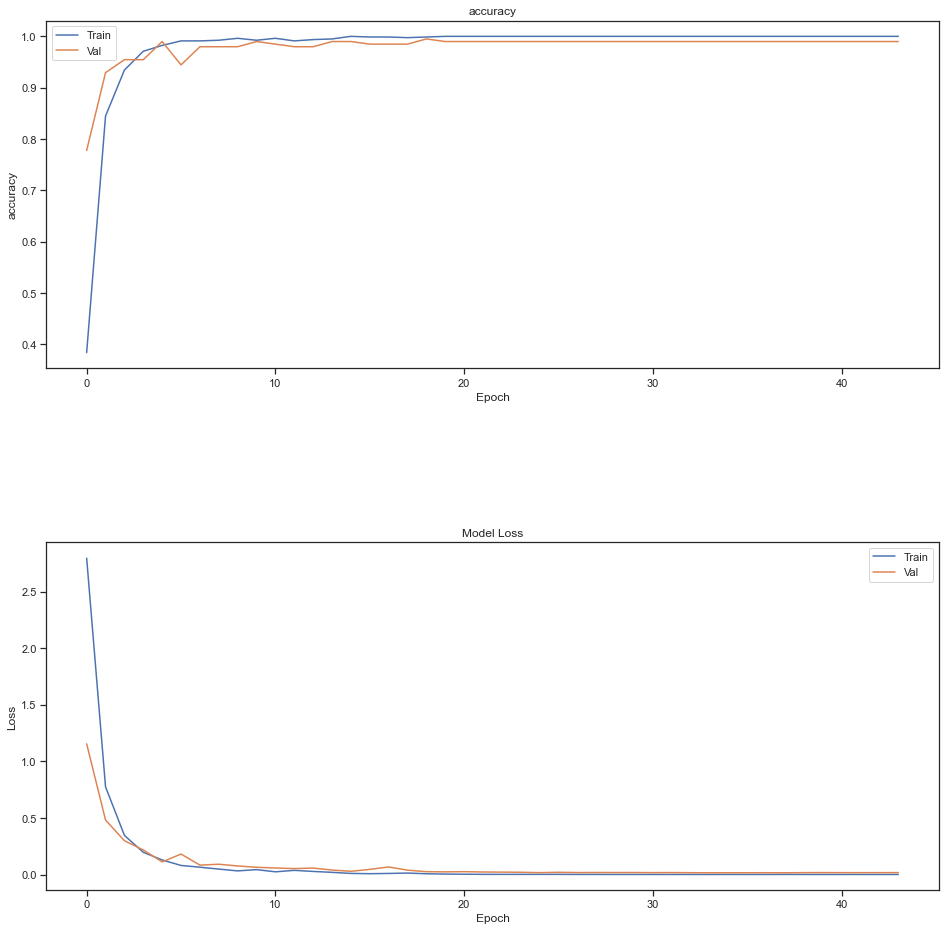

In [37]:
evaluate_diff_model(optimizer="RMSprop",dropout=0.4,hidden_layer =128,batch_size = 64)